# Fundamentals of Machine Learning
## Kavindu Jointe | IMDD-D02
Master Data-Driven Design

University of Applied Science Utrecht

Week 3: Linear Regression

In [1]:
import pandas as pd
import seaborn as sns  
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
df = pd.read_csv("data Mashable.csv") 
df.head()

id                                                url  n_tokens_title  \
0   1  http://mashable.com/2013/10/29/ashton-kutcher-...              10   
1   2  http://mashable.com/2014/09/08/mashies-sept-19...               9   
2   3  http://mashable.com/2013/02/01/hello-kitty-roc...              11   
3   4  http://mashable.com/2014/02/06/add-us-on-snapc...               8   
4   5  http://mashable.com/2014/01/07/lindsey-vonn-wi...               9   

   n_tokens_content  num_imgs  num_videos  average_token_length  \
0               821        12           0              4.518879   
1               489         6           0              5.040900   
2               131         0           1              4.877863   
3               556         2           0              4.974820   
4               880        18           0              4.928409   

   data_channel_is_lifestyle  data_channel_is_entertainment  \
0                          0                              0   
1                          0                              0   
2                          0                              0   
3                          0                              0   
4                          0                              0   

   data_channel_is_bus  ...  weekday_is_friday  weekday_is_saturday  \
0                    0  ...                  0                    0   
1                    0  ...                  0                    0   
2                    0  ...                  1                    0   
3                    1  ...                  0                    0   
4                    0  ...                  0                    0   

   weekday_is_sunday  is_weekend  global_subjectivity  \
0                  0           0             0.439379   
1                  0           0             0.300454   
2                  0           0             0.575486   
3                  0           0             0.327220   
4                  0           0             0.507709   

   global_sentiment_polarity  title_subjectivity  title_sentiment_polarity  \
0                   0.082486            0.666667                     0.375   
1                   0.027715            0.000000                     0.000   
2                   0.259120            0.000000                     0.000   
3                   0.134424            0.000000                     0.000   
4                   0.109256            0.000000                     0.000   

   shares  shares_log  
0    2100    3.322219  
1     274    2.437751  
2    1500    3.176091  
3    2000    3.301030  
4    6000    3.778151  

[5 rows x 27 columns]

In [3]:
df.shape

(24999, 27)

In [4]:
df.dtypes

id                                 int64
url                               object
n_tokens_title                     int64
n_tokens_content                   int64
num_imgs                           int64
num_videos                         int64
average_token_length             float64
data_channel_is_lifestyle          int64
data_channel_is_entertainment      int64
data_channel_is_bus                int64
data_channel_is_socmed             int64
data_channel_is_tech               int64
data_channel_is_world              int64
weekday_is_monday                  int64
weekday_is_tuesday                 int64
weekday_is_wednesday               int64
weekday_is_thursday                int64
weekday_is_friday                  int64
weekday_is_saturday                int64
weekday_is_sunday                  int64
is_weekend                         int64
global_subjectivity              float64
global_sentiment_polarity        float64
title_subjectivity               float64
title_sentiment_

In [5]:
df['shares'].describe()

count     24999.000000
mean       3523.734229
std       13098.996472
min           1.000000
25%         954.000000
50%        1500.000000
75%        2900.000000
max      843300.000000
Name: shares, dtype: float64

In [6]:
#article with most shares
df.loc[df['shares'] == df['shares'].max()]

id                                              url  n_tokens_title  \
15508  15509  http://mashable.com/2013/07/03/low-cost-iphone/              12   

       n_tokens_content  num_imgs  num_videos  average_token_length  \
15508               688        15           1              4.893895   

       data_channel_is_lifestyle  data_channel_is_entertainment  \
15508                          0                              0   

       data_channel_is_bus  ...  weekday_is_friday  weekday_is_saturday  \
15508                    0  ...                  0                    0   

       weekday_is_sunday  is_weekend  global_subjectivity  \
15508                  0           0             0.503345   

       global_sentiment_polarity  title_subjectivity  \
15508                   0.186037                 0.1   

       title_sentiment_polarity  shares  shares_log  
15508                      -0.3  843300    5.925982  

[1 rows x 27 columns]

In [7]:
df.loc[df['shares'] == df['shares'].min()]

id                                                url  \
15708  15709  http://mashable.com/2013/12/09/wand-remote-con...   

       n_tokens_title  n_tokens_content  num_imgs  num_videos  \
15708              11               944         0          23   

       average_token_length  data_channel_is_lifestyle  \
15708              4.648305                          0   

       data_channel_is_entertainment  data_channel_is_bus  ...  \
15708                              0                    1  ...   

       weekday_is_friday  weekday_is_saturday  weekday_is_sunday  is_weekend  \
15708                  0                    0                  0           0   

       global_subjectivity  global_sentiment_polarity  title_subjectivity  \
15708             0.552966                   0.165502                 0.0   

       title_sentiment_polarity  shares  shares_log  
15708                       0.0       1         0.0  

[1 rows x 27 columns]

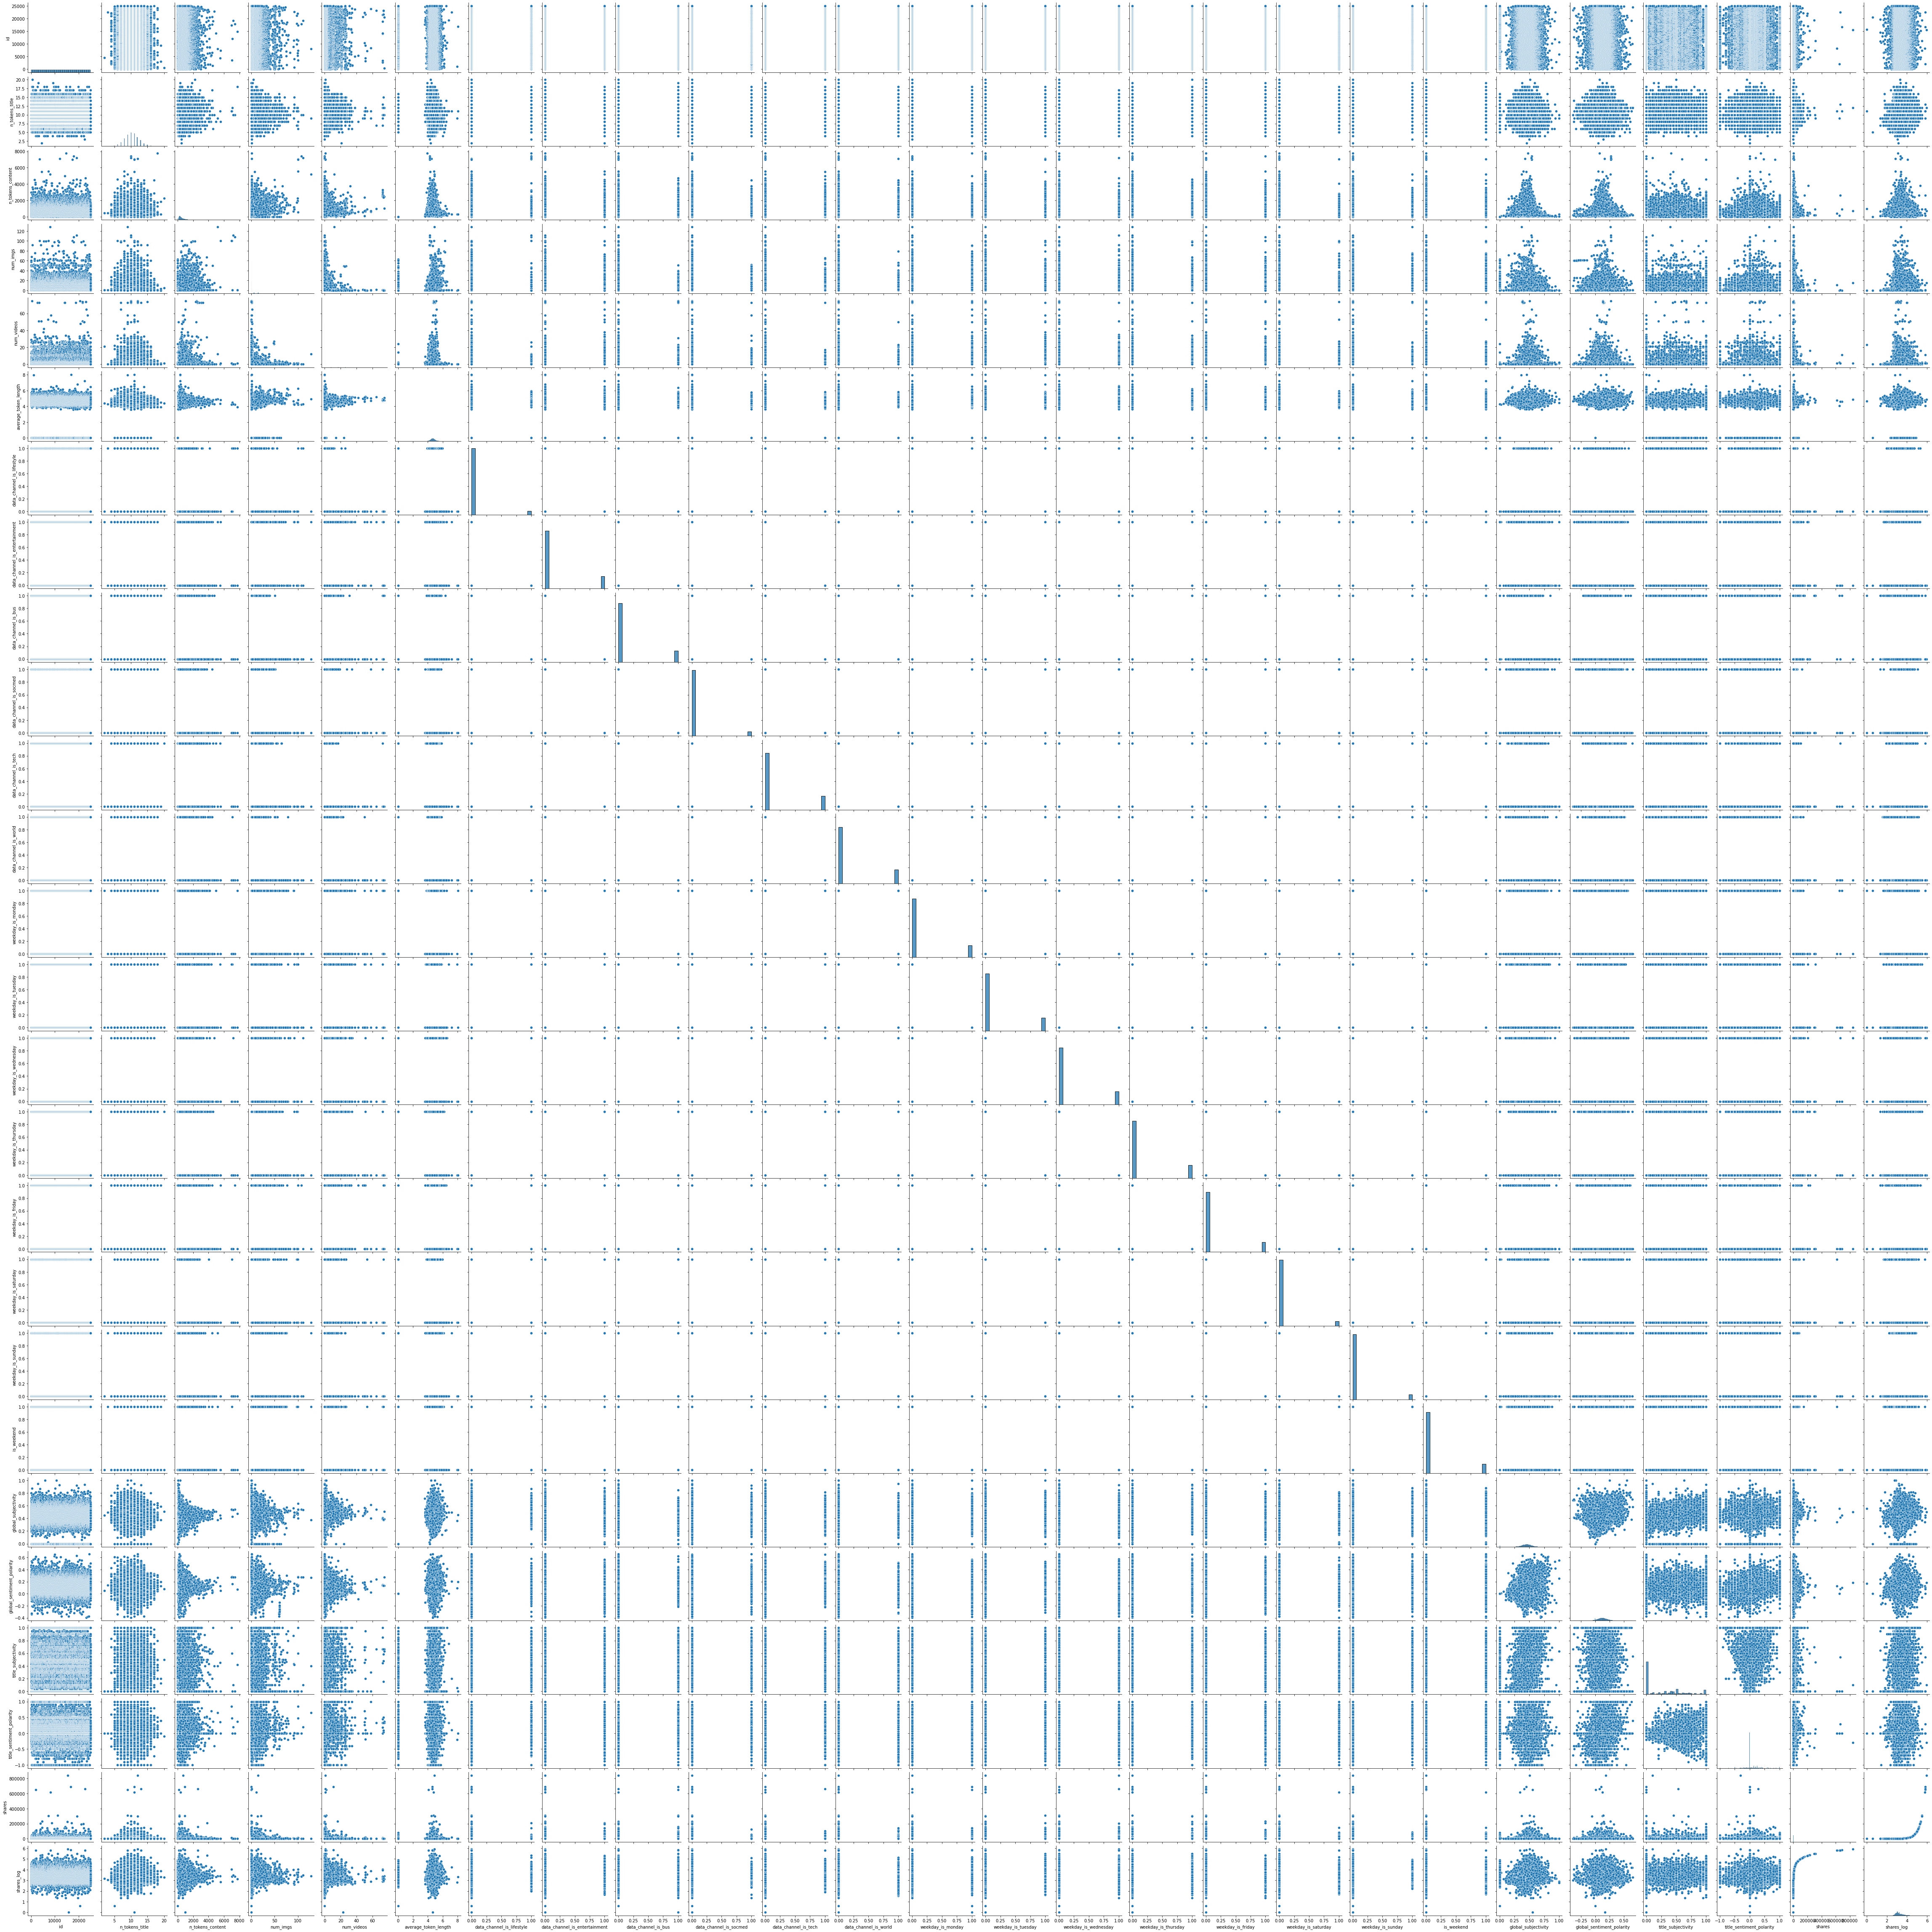

In [8]:
import seaborn as sns
sns.pairplot(df)

In [9]:
newdf = df[['data_channel_is_lifestyle', 'data_channel_is_entertainment', 'data_channel_is_socmed','data_channel_is_tech','data_channel_is_world','data_channel_is_bus','n_tokens_title', 'n_tokens_content','num_imgs', 'num_videos', 'global_sentiment_polarity','weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday','weekday_is_thursday','weekday_is_friday','weekday_is_saturday','weekday_is_sunday', 'shares']]
newdf.head()


data_channel_is_lifestyle  data_channel_is_entertainment  \
0                          0                              0   
1                          0                              0   
2                          0                              0   
3                          0                              0   
4                          0                              0   

   data_channel_is_socmed  data_channel_is_tech  data_channel_is_world  \
0                       0                     1                      0   
1                       0                     0                      1   
2                       0                     0                      0   
3                       0                     0                      0   
4                       0                     1                      0   

   data_channel_is_bus  n_tokens_title  n_tokens_content  num_imgs  \
0                    0              10               821        12   
1                    0               9               489         6   
2                    0              11               131         0   
3                    1               8               556         2   
4                    0               9               880        18   

   num_videos  global_sentiment_polarity  weekday_is_monday  \
0           0                   0.082486                  0   
1           0                   0.027715                  1   
2           1                   0.259120                  0   
3           0                   0.134424                  0   
4           0                   0.109256                  0   

   weekday_is_tuesday  weekday_is_wednesday  weekday_is_thursday  \
0                   1                     0                    0   
1                   0                     0                    0   
2                   0                     0                    0   
3                   0                     0                    1   
4                   1                     0                    0   

   weekday_is_friday  weekday_is_saturday  weekday_is_sunday  shares  
0                  0                    0                  0    2100  
1                  0                    0                  0     274  
2                  1                    0                  0    1500  
3                  0                    0                  0    2000  
4                  0                    0                  0    6000

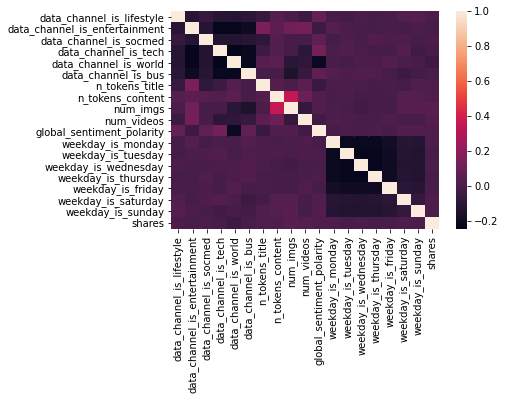

In [10]:
ax = sns.heatmap(newdf.corr())

In [11]:
newdf.shape

(24999, 19)

<AxesSubplot:xlabel='num_imgs', ylabel='shares'>

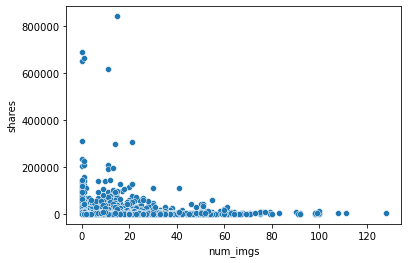

In [12]:
sns.scatterplot(data=newdf, x="num_imgs", y="shares")


<AxesSubplot:xlabel='n_tokens_content', ylabel='shares'>

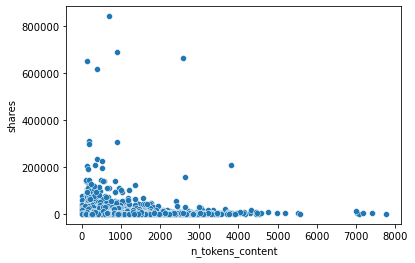

In [13]:
sns.scatterplot(data=newdf, x="n_tokens_content", y="shares")


In [14]:
#scale data 
import pandas as pd
from sklearn import preprocessing

x = newdf.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
newdf = pd.DataFrame(x_scaled)

In [15]:
X = newdf.iloc[:, 0:18].values
y = newdf.iloc[:, 18].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X_train, y_train)  # perform linear regression
y_pred = linear_regressor.predict(X_test)  # make predictions


print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

Mean Squared Error: 0.0003194929495186429
Root Mean Squared Error: 0.017874365709547372
Mean Absolute Error: 0.003948313317625886


Linear Regression Model Equation: Y = a + bX1 + cX2 + dX3 + eX4 + fX5 + gX6
b, c, d, e, f, g represent the gradient 
x1, x2, x3, x4, x5, x6 are the column values 